# Prior knowledge

- Python
- Pandas / Numpy
- Statistics
- intuition behind a fit

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import seaborn as sns
from matplotlib import pyplot as plt

# Statistics

## Central Tendency

### Mean $\mu = \frac{\sum^n_{i=1}X_i}{n}$

### Median 

### Mode 

### Range $ = max(X) - min(X)$

--------------

## Variance $\sigma^2$

###  Population: $\sigma^2 = \frac{\sum{(X-\mu)^2}}{N}$

###  Sample: $s^2 = \frac{\sum{(x-\bar{x})^2}}{n-1}$


--------------

## Standard Deviation $\sigma$

###  Population: $\sigma = \sqrt{\frac{\sum{(X-\mu)^2}}{N}}$

### Sample: $s = \sqrt{\frac{\sum{(x-\bar{x})^2}}{n-1}}$

--------------

## Covariance

### Population: $\frac{\sum{((X_i - \bar{X})  (Y_i - \bar{Y}))}}{N}$

### Sample: $\frac{\sum{((X_i - \bar{X})  (Y_i - \bar{Y}))}}{N-1}$

varies $\infty - \infty$

--------------

## Correlation *Pearson*

### Population : $r = \frac{\text{Covariance(x,y)}}{s_x s_y}$

varies $-1 to 1$

--------------

# Considerations

## Scatterplot

In [3]:
df = sns.load_dataset("mpg")

In [4]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [4]:
df[["weight", "mpg"]].to_clipboard(index=False)

---------

In [5]:
#TODO: scatterplot of 
#df["weight"]
#df["mpg"]

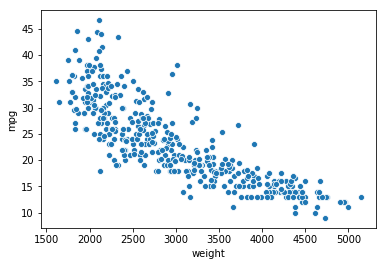

In [5]:
sns.scatterplot(df["weight"], df["mpg"])

In [7]:
#TODO: scatterplot of 
#df["horsepower"]
#df["mpg"]

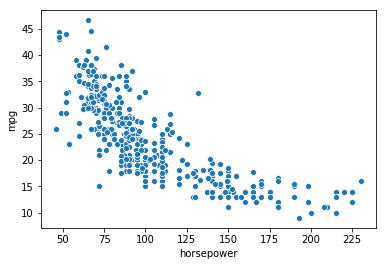

In [6]:
sns.scatterplot(df["horsepower"], df["mpg"])

In [9]:
#TODO: boxplot of 
#df["cylinders"]
#df["mpg"]

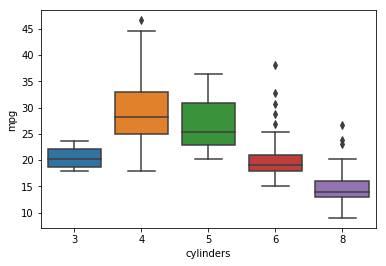

In [8]:
sns.boxplot(df["cylinders"], df["mpg"])

## Objective: Line of best fit

### Equation of a line $y = bx + a$
https://www.desmos.com/calculator/lm5mjfeors

![equation_of_the_line.png](equation_of_the_line.png)

# Least Squares

## $y = mx + c$

- $y$ = how far up

- $x$ = how far along

- $m$ = Slope or Gradient (how steep the line is)

- $b$ = the Y Intercept (where the line crosses the Y axis)

------


## $m = \frac{covariance(x,y)}{\sigma^2}$

## $m = \frac{\sum^n_{i=1}(x_i-\bar{x})(y_i-\bar{y})}{\sum^n_{i=1}(x_i-\bar{x})^2}$

--------

## $c = \bar{y} - m\bar{x}$

--------

[regressao_to_complete.xlsx](regressao_to_complete.xlsx)


Note: existen otras formas para evaluar el resultado.
Comunmente evaluam com *$R^2$* e com *P-valor*

- $R^2$: evalua cuantos % explicamos la variabilidad del codigo en relacion la media
- P-Valor: evalua la **significancia** de la evaluacion (si no fue un evento aleatorio)

In [9]:
X = df["weight"]
y = df["mpg"]

In [10]:
import numpy as np

## prepare $\bar{x}$ and $\bar{y}$

In [11]:
X_mean = np.mean(X)
y_mean = np.mean(y)

## covariance(x,y)

$cov(x,y) = \sum{\frac{((X_i - \bar{X})  (Y_i - \bar{Y}))}{N}}$

In [18]:
covariance = np.sum((X - X_mean)*(y - y_mean)/len(X))
print(covariance)

-5491.379554809221


## prepare $\sigma^2$

$\sigma^2 = \frac{\sum{(X-\mu)^2}}{N}$

In [24]:
variance = np.sum((X-X_mean)**2)/len(X)
print(variance)

715339.1287404358


## retrieve the slope of the line $M$

$m = \frac{covariance(x,y)}{\sigma^2}$

In [25]:
m = covariance / variance
print(m)

-0.007676610063926469


## retrieve the intercept in the y-axis $c$

$c = \bar{y} - m\bar{x}$

In [26]:
c = y_mean - m*X_mean
print(c)

46.31736442026564


## predict values
$y = mx + c$

In [27]:
y_pred_ls = m*X + c

In [28]:
y_pred_ls.head()

0    19.418523
1    17.967643
2    19.940532
3    19.963562
4    19.840736
Name: weight, dtype: float64

In [49]:
plt.figure(figsize=(15,5))
sns.scatterplot(df["weight"], df["mpg"])
sns.lineplot(df["weight"], y_pred_ls, color="red")

In [50]:
from sklearn import metrics
print("MSE: ",metrics.mean_squared_error(y,y_pred_ls))

MSE:  18.780939734628394


# Machine Learning

In [51]:
X = pd.DataFrame(X)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
regressor = LinearRegression()

### fit the model

In [54]:
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
y_pred_ml = regressor.predict(X)

In [56]:
print("slope m = ", regressor.coef_)
print("intercept c = ", regressor.intercept_)

slope m =  [-0.00767661]
intercept c =  46.31736442026563


In [57]:
plt.figure(figsize=(15,5))
sns.scatterplot(df["weight"], df["mpg"])
sns.lineplot(df["weight"], y_pred_ml, color="red")

In [58]:
from sklearn import metrics
print("MSE: ",metrics.mean_squared_error(y,y_pred_ml))

MSE:  18.780939734628394


# Other forms: Polynomial Regression (degree 2)

![poly_equation_of_the_line_2.png](poly_equation_of_the_line_2.png)

In [59]:
X["weight"].head()

0    3504
1    3693
2    3436
3    3433
4    3449
Name: weight, dtype: int64

In [60]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)

In [61]:
X_ = pd.DataFrame(X_)
X_.head()

0       1           2
0  1.0  3504.0  12278016.0
1  1.0  3693.0  13638249.0
2  1.0  3436.0  11806096.0
3  1.0  3433.0  11785489.0
4  1.0  3449.0  11895601.0

In [63]:
regressor.fit(X_, y)
y_pred_ml_poly = regressor.predict(X_)

In [64]:
from sklearn import metrics

print("MSE: ",metrics.mean_squared_error(y,y_pred_ml_poly))

MSE:  17.37970478749354


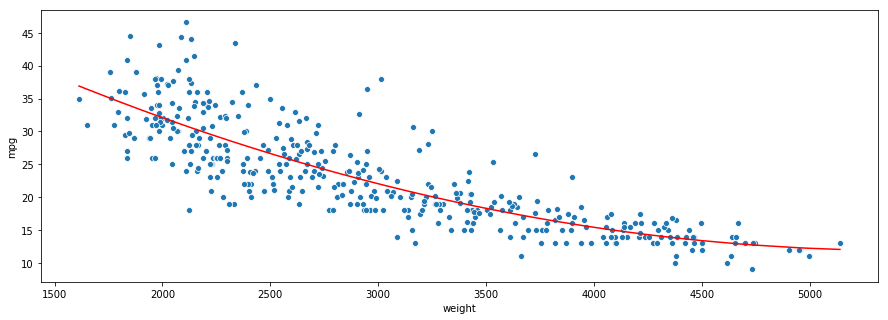

In [68]:
plt.figure(figsize=(15,5))
sns.scatterplot(df["weight"], df["mpg"])
sns.lineplot(df["weight"], y_pred_ml_poly, color="red")

### y intercept $c$

In [66]:
regressor.intercept_

62.516652222029045

### m coefs

In [67]:
regressor.coef_

array([ 0.        , -0.01864232,  0.00000172])

# Other forms: Multivariate Regression

In [69]:
X = df[["weight", "horsepower"]]
y = df["mpg"]

In [70]:
X = X.fillna(0)

In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
y_pred_ml_mult = regressor.predict(X)

In [74]:
from sklearn import metrics
print("MSE: ",metrics.mean_squared_error(y_pred_ml_mult, y))

MSE:  18.109334349385904


In [75]:
regressor.intercept_

45.73961773039758

In [76]:
regressor.coef_[0]

-0.00618864832974654

In [47]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(df, x="weight", y="horsepower", z="mpg", color="mpg", size="mpg")
fig.show()